# Statsmodels

/Users/sch0109l/Documents/playground/time_series_forecasting/.venv/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


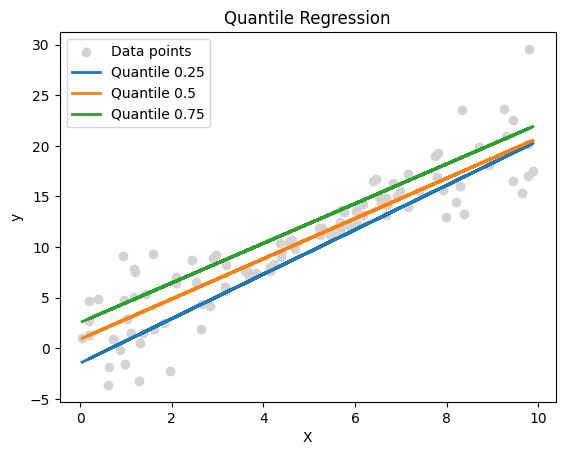

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
n = 100
X = np.random.uniform(0, 10, size=n)
y = 2 * X + 1 + np.random.normal(0, 1, size=n) * (X - 5)  # Heteroscedasticity

# Create a DataFrame
data = pd.DataFrame({"X": X, "y": y})

# Fit quantile regression models for different quantiles
quantiles = [0.25, 0.5, 0.75]
results = {}

for q in quantiles:
    model = sm.QuantReg(
        data["y"], sm.add_constant(data["X"])
    )  # add_constant for the intercept
    results[q] = model.fit(q=q)

# Plot the data and the quantile regression lines
plt.scatter(data["X"], data["y"], color="lightgray", label="Data points")

# Plotting the quantile regression lines
for q in quantiles:
    plt.plot(
        data["X"],
        results[q].predict(sm.add_constant(data["X"])),
        label=f"Quantile {q}",
        linewidth=2,
    )

plt.xlabel("X")
plt.ylabel("y")
plt.title("Quantile Regression")
plt.legend()
plt.show()


# Pytorch

$ 2X + 1 + \epsilon (X-5)$

$X_i \sim \mathcal{U}(0, 10)$ for all $i \in [N]$

$ \epsilon \sim \mathcal{N}(0,I_{N \times N})$

Epoch 0, Loss: 7.254253387451172
Epoch 100, Loss: 0.6275147795677185
Epoch 200, Loss: 0.6226506233215332
Epoch 300, Loss: 0.6218373775482178
Epoch 400, Loss: 0.6212246417999268
Epoch 500, Loss: 0.620866596698761
Epoch 600, Loss: 0.6207442283630371
Epoch 700, Loss: 0.6207357048988342
Epoch 800, Loss: 0.6207299828529358
Epoch 900, Loss: 0.6207450032234192


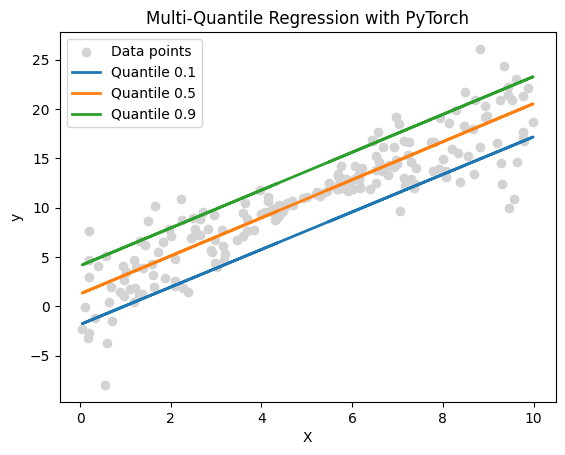

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
n = 200
X = np.random.uniform(0, 10, size=(n, 1)).astype(np.float32)
y = (2 * X + 1 + np.random.normal(0, 1, size=(n, 1)) * (X - 5)).astype(
    np.float32
)  # Heteroscedasticity

# Convert to torch tensors
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)


# Define the multi-quantile regression model
class MultiQuantileRegressionModel(nn.Module):
    def __init__(self, quantiles):
        super(MultiQuantileRegressionModel, self).__init__()
        self.quantiles = quantiles
        self.linear = nn.Linear(1, len(quantiles))  # Output one value for each quantile

    def forward(self, x):
        return self.linear(x)


# Pinball Loss (Quantile Loss) for multiple quantiles
def multi_quantile_loss(y_true, y_pred, quantiles):
    assert (
        len(quantiles) == y_pred.shape[1]
    ), "Mismatch between quantile count and model output"
    losses = []
    for i, q in enumerate(quantiles):
        errors = y_true - y_pred[:, i : i + 1]
        loss = torch.max(q * errors, (q - 1) * errors)
        losses.append(torch.mean(loss))
    return torch.mean(torch.stack(losses))


# Define quantiles and create the model
quantiles = [0.1, 0.5, 0.9]
model = MultiQuantileRegressionModel(quantiles)

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.05)

# Training loop
n_epochs = 1000
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_tensor)
    loss = multi_quantile_loss(y_tensor, y_pred, quantiles)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plot the results
with torch.no_grad():
    model.eval()
    y_pred = model(X_tensor).numpy()

# Plot data and quantile regression results
plt.scatter(X, y, color="lightgray", label="Data points")

for i, q in enumerate(quantiles):
    plt.plot(X, y_pred[:, i], label=f"Quantile {q}", linewidth=2)

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Multi-Quantile Regression with PyTorch")
plt.show()


Epoch 0, Loss: 5.983625888824463
Epoch 100, Loss: 0.5904093980789185
Epoch 200, Loss: 0.5724947452545166
Epoch 300, Loss: 0.5552948117256165
Epoch 400, Loss: 0.5416272282600403
Epoch 500, Loss: 0.536823034286499
Epoch 600, Loss: 0.537834107875824
Epoch 700, Loss: 0.5344062447547913
Epoch 800, Loss: 0.5372728705406189
Epoch 900, Loss: 0.5405510663986206


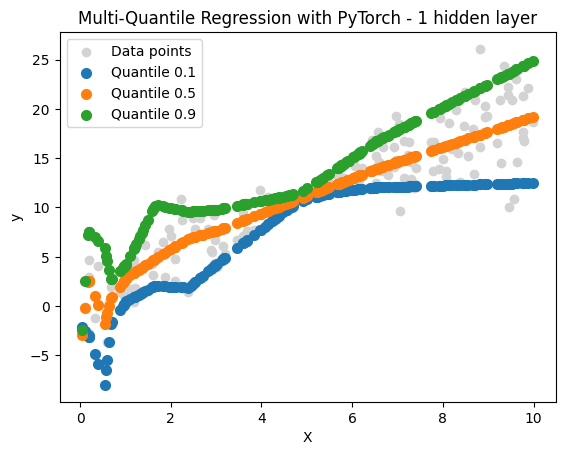

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
n = 200
X = np.random.uniform(0, 10, size=(n, 1)).astype(np.float32)
y = (2 * X + 1 + np.random.normal(0, 1, size=(n, 1)) * (X - 5)).astype(
    np.float32
)  # Heteroscedasticity

# Convert to torch tensors
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)



# Define the multi-quantile regression model
class MultiQuantileRegressionModel(nn.Module):
    def __init__(self, quantiles):
        super().__init__()
        self.quantiles = quantiles
        self.layer1 = nn.Linear(1, 1000)
        self.linear2 = nn.Linear(1000, len(quantiles))  # Output one value for each quantile

    def forward(self, x):
        z = nn.ReLU()(self.layer1(x))
        return self.linear2(z)


# Pinball Loss (Quantile Loss) for multiple quantiles
def multi_quantile_loss(y_true, y_pred, quantiles):
    assert (
        len(quantiles) == y_pred.shape[1]
    ), "Mismatch between quantile count and model output"
    losses = []
    for i, q in enumerate(quantiles):
        errors = y_true - y_pred[:, i : i + 1]
        loss = torch.max(q * errors, (q - 1) * errors)
        losses.append(torch.mean(loss))
    return torch.mean(torch.stack(losses))


# Define quantiles and create the model
quantiles = [0.1, 0.5, 0.9]
model = MultiQuantileRegressionModel(quantiles)

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.05)

# Training loop
n_epochs = 1000
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_tensor)
    loss = multi_quantile_loss(y_tensor, y_pred, quantiles)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plot the results
with torch.no_grad():
    model.eval()
    y_pred = model(X_tensor).numpy()

# Plot data and quantile regression results
plt.scatter(X, y, color="lightgray", label="Data points")

for i, q in enumerate(quantiles):
    plt.scatter(X, y_pred[:, i], label=f"Quantile {q}", linewidth=2)

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Multi-Quantile Regression with PyTorch - 1 hidden layer")
plt.show()
